<a href="https://colab.research.google.com/github/abhinavdayal/EIP_Session3/blob/master/Success02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, SeparableConv2D, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(17) 

TensorFlow 2.x selected.


Using TensorFlow backend.


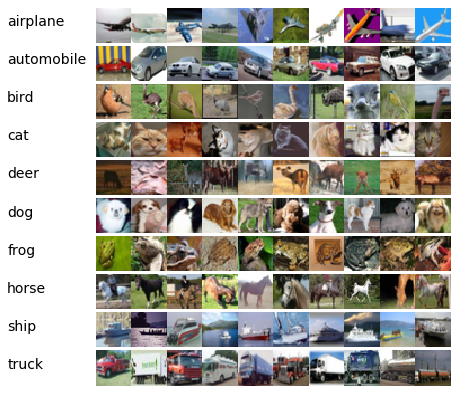

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels  =  train_features.shape
num_test, _, _, _ =  test_features.shape
labels = np.unique(train_labels)
num_classes = len(labels)
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(train_labels[:]==i)[0], 10, replace=False)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, 11):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(train_features[idx[j-1]], interpolation='none')
      plt.axis('off')
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    test_iterator = datagen.flow(test_x, test_y, batch_size=64)
    _, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=1)
    return (acc * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [10]:
# Define the model, Since image size is already small we wont use stride > 1.
# we have to use only separatble convolution
model = keras.Sequential()

# rin=1, nin = 32x32, cin= 3, jin=1, k=3, p=1, s=1, jout=1, rout=3, nout=32x32, cout=16
model.add(SeparableConv2D(filters=32, kernel_size=(3, 3), padding='same', depth_multiplier=1, input_shape=(32, 32, 3), use_bias=False))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=3, nin = 32x32, cin=16, jin=1, k=3, p=1, s=1, jout=1, rout=5, nout=32x32, cout=32
model.add(SeparableConv2D(filters=48, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=5, nin = 32x32, cin=32, jin=1, k=3, p=1, s=1, jout=1, rout=7, nout=32x32, cout=48
model.add(SeparableConv2D(filters=96, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=7, nin = 32x32, cin=48, jin=1, k=2, p=0, s=2, jout=2, rout=8, nout=16x16, cout=48
model.add(MaxPooling2D())

# rin=8, nin = 16x16, cin= 48, jin=2, k=3, p=1, s=1, jout=2, rout=12, nout=16x16, cout=64
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=12, nin = 16x16, cin= 64, jin=2, k=3, p=1, s=1, jout=2, rout=16, nout=16x16, cout=96
model.add(SeparableConv2D(filters=160, kernel_size=(3, 3), padding='same', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=16, nin = 16x16, cin=96, jin=2, k=2, p=0, s=2, jout=4, rout=18, nout=8x8, cout=96
model.add(MaxPooling2D())

# rin=18, nin = 8x8, cin= 96, jin=4, k=3, p=0, s=1, jout=4, rout=26, nout=6x6, cout=192
model.add(SeparableConv2D(filters=192, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Activation('relu'))

# rin=26, nin = 6x6, cin= 192, jin=4, k=3, p=0, s=1, jout=4, rout=34, nout=4x4, cout=10 Cfar_10 has 10 classes
model.add(SeparableConv2D(filters=num_classes, kernel_size=(3, 3), padding='valid', depth_multiplier=1, use_bias=False))
# not adding any activation or batch normalization after the last convolution layer

# output size = 1x1x10
model.add(GlobalAveragePooling2D())
model.add(Flatten()) # 10x1
model.add(Activation('softmax')) # get probabilities

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 32)        123       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 32, 32, 48)        1824      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 48)       

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

datagen.fit(train_features)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/50
195/195 [==============================] - 116s 595ms/step - loss: 1.1883 - accuracy: 0.5775 - val_loss: 1.6807 - val_accuracy: 0.4642

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0082034454.
Epoch 2/50
195/195 [==============================] - 117s 599ms/step - loss: 0.9222 - accuracy: 0.6762 - val_loss: 1.2664 - val_accuracy: 0.6263

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0069541029.
Epoch 3/50
195/195 [==============================] - 117s 602ms/step - loss: 0.8036 - accuracy: 0.7195 - val_loss: 0.9407 - val_accuracy: 0.6955

Epoch 00004: LearningRateScheduler reducing learning rate to 0.006035003.
Epoch 4/50
195/195 [==============================] - 117s 599ms/step - loss: 0.7260 - accuracy: 0.7478 - val_loss: 0.7579 - val_accuracy: 0.7412

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0053304904.
Epoch 5/50
195/195 [=========================

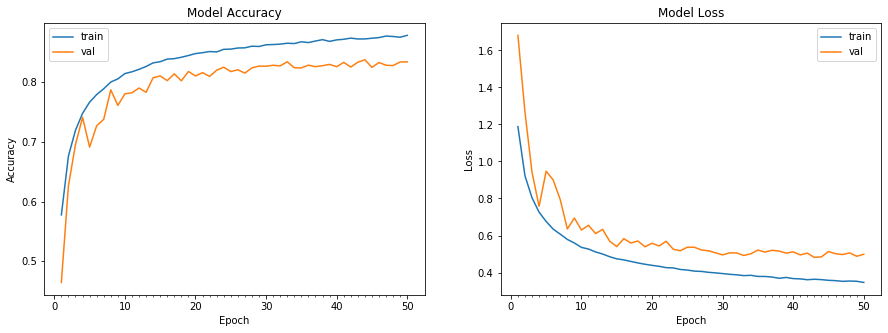

In [14]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.219 * epoch), 10)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 steps_per_epoch = (train_features.shape[0]//256), epochs = 50, 
                                 validation_data = datagen.flow(test_features, test_labels, batch_size=256), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)


In [17]:
# print accuracy
print('Test Accuracy: %.3f' % (accuracy(test_features, test_labels, model)))


157/157 [==============================] - 18s 112ms/step - loss: 0.4728 - accuracy: 0.8379
Test Accuracy: 83.790
